<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_6_intro_nn_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO NEURAL NETWORKS, PART 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# keras
from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Dense
from keras import optimizers
from sklearn.linear_model import LinearRegression
from datetime import datetime
# torch
import torch

In [ ]:
!pip install torchinfo
from torchinfo import summary as torch_summary

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Linear Regression (again)
### Data:
We are given $n$ points $(x_1,y_1), \ldots, (x_n,y_n)$.
Example: $n=200$:

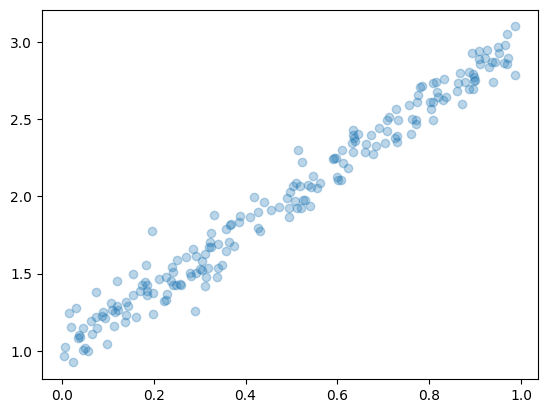

In [ ]:
nr_points=200
np.random.seed(42)
x_train = np.random.rand(nr_points, 1)

a_true=2;
b_true=1;
y_train = b_true + a_true * x_train + .1 * np.random.randn(nr_points, 1)

plt.scatter(x_train,y_train,alpha=0.3)

# LinReg from sklearn, to compare

linr = LinearRegression()
linr.fit(x_train, y_train)
a_skl = linr.coef_[0].item()
b_skl = linr.intercept_.item()



## Simplest Neural Network:
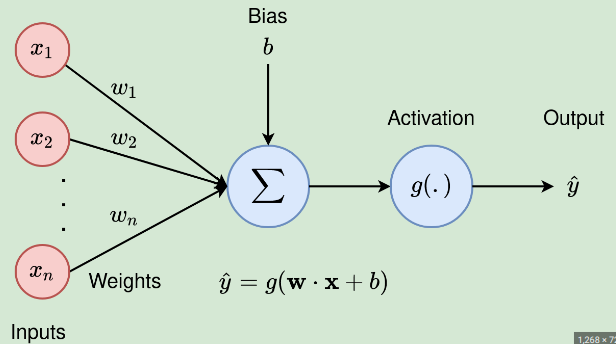

In our case $n=1$: $w_1=a$, bias $ = b, g(x)=x$

# Keras implementation:

In [ ]:

# create model, ONE neuron, input_dim = 1
# activation = linear, actually = do nothing extra.
model_keras = Sequential()
model_keras.add(Dense(1, activation = 'linear', input_dim = 1))  # x's are 1 dimensional

In [ ]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# use Adam() or SGD() optimizer
#optim = optimizers.SGD()
optim = optimizers.Adam(learning_rate=0.1)

# loss = mean_squared_error. I.e., optimze squared error
model_keras.compile(optimizer=optim, loss = 'mean_squared_error')

### TRAIN the model:

In [ ]:
model_keras.fit(x_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
2/2 [==============================] - 3s 16ms/step - loss: 6.6380
Epoch 2/200
2/2 [==============================] - 0s 14ms/step - loss: 5.2079
Epoch 3/200
2/2 [==============================] - 0s 13ms/step - loss: 3.9400
Epoch 4/200
2/2 [==============================] - 0s 14ms/step - loss: 2.8863
Epoch 5/200
2/2 [==============================] - 0s 14ms/step - loss: 2.0140
Epoch 6/200
2/2 [==============================] - 0s 12ms/step - loss: 1.3549
Epoch 7/200
2/2 [==============================] - 0s 15ms/step - loss: 0.8359
Epoch 8/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5050
Epoch 9/200
2/2 [==============================] - 0s 17ms/step - loss: 0.2967
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1898
Epoch 11/200
2/2 [==============================] - 0s 19ms/step - loss: 0.1633
Epoch 12/200
2/2 [==============================] - 0s 11ms/step - loss: 0.1816
Epoch 13/200
2/2 [==============================] 

In [ ]:
y_pred = model_keras.predict(x_train)

7/7 [==============================] - 0s 5ms/step


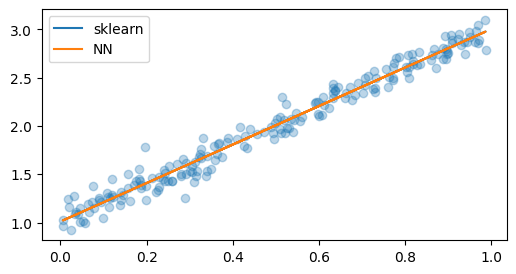

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(x_train,y_train,alpha=0.3)

plt.plot(x_train ,a_skl*x_train +b_skl, label = "sklearn")
plt.plot(x_train,y_pred, label = "NN")

plt.legend()

## Torch implementation

To bo consistent with `MoCaDR_List_nr_5_auto_grad.ipynb` one may use `torch`. Note however, that there is no (simple) splitting data into batches (one would need to do it manually, or use `torch.utils.data.DataLoader()`)

# we need data as tensors

In [ ]:
x_train_tensor = torch.tensor(x_train.astype(float), device=device, dtype=torch.float32 )
y_train_tensor = torch.tensor(y_train.astype(float), device=device, dtype=torch.float32 )


In [ ]:
model =torch.nn.Sequential( torch.nn.Linear(1,1)).to(device)


In [ ]:
torch_summary(model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

In [ ]:
#model(x_train_tensor).T # predicted y's

In [ ]:
optimizer_torch =  torch.optim.SGD(params=model.parameters(),lr=0.2)

In [ ]:
loss_torch = torch.nn.MSELoss()

In [ ]:
loss_torch(x_train_tensor, y_train_tensor)

tensor(2.3168, device='cuda:0')

In [ ]:
n_epochs = 200

for epoch in range(n_epochs):
  y_pred_tensor = model(x_train_tensor)
  loss = loss_torch(y_pred_tensor, y_train_tensor)
  loss.backward()
  optimizer_torch.step()
  optimizer_torch.zero_grad()
  if epoch % 10 == 0:
    print("epoch = ", epoch, ",\t loss = ",loss.item())

epoch =  0 ,	 loss =  4.778941631317139
epoch =  10 ,	 loss =  0.02347751520574093
epoch =  20 ,	 loss =  0.01740557700395584
epoch =  30 ,	 loss =  0.013942591845989227
epoch =  40 ,	 loss =  0.011966131627559662
epoch =  50 ,	 loss =  0.010838091373443604
epoch =  60 ,	 loss =  0.010194271802902222
epoch =  70 ,	 loss =  0.009826820343732834
epoch =  80 ,	 loss =  0.009617098607122898
epoch =  90 ,	 loss =  0.009497405961155891
epoch =  100 ,	 loss =  0.009429090656340122
epoch =  110 ,	 loss =  0.009390100836753845
epoch =  120 ,	 loss =  0.009367846883833408
epoch =  130 ,	 loss =  0.009355148300528526
epoch =  140 ,	 loss =  0.009347899816930294
epoch =  150 ,	 loss =  0.009343763813376427
epoch =  160 ,	 loss =  0.009341401048004627
epoch =  170 ,	 loss =  0.009340053424239159
epoch =  180 ,	 loss =  0.009339284151792526
epoch =  190 ,	 loss =  0.009338843636214733


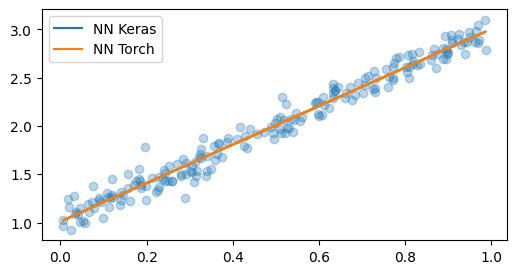

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(x_train,y_train,alpha=0.3)

#plt.plot(x_train ,a_skl*x_train +b_skl, label = "sklearn")

plt.plot(x_train,y_pred, label = "NN Keras")
plt.plot(x_train,y_pred_tensor.cpu().detach().numpy(), label = "NN Torch")


plt.legend()

# Predicting house prices

from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
houses = fetch_california_housing()

n_samples, dim = houses.data.shape

houses_data = houses.data
houses_x = houses.data
houses_y = houses.target
#mnist_points =        mnist.data[:max_n]
#mnist_data_classes =  mnist.target[:max_n]
#mnist_classes_names  =      mnist.target_names


In [ ]:
print(np.round(houses_x[:3],2))
print(np.round(houses_y[:3],2))


[[ 8.3300e+00  4.1000e+01  6.9800e+00  1.0200e+00  3.2200e+02  2.5600e+00
   3.7880e+01 -1.2223e+02]
 [ 8.3000e+00  2.1000e+01  6.2400e+00  9.7000e-01  2.4010e+03  2.1100e+00
   3.7860e+01 -1.2222e+02]
 [ 7.2600e+00  5.2000e+01  8.2900e+00  1.0700e+00  4.9600e+02  2.8000e+00
   3.7850e+01 -1.2224e+02]]
[4.53 3.58 3.52]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(  houses_x, houses_y, test_size=0.2, random_state=42)




### Goal: train model on x_train, y_train, test afterwards on x_test, y_test

In [ ]:
model_keras = Sequential()
model_keras.add(Dense(1, activation = 'linear', input_dim = 8))  # x's are 8 dimensional
model_keras.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
first_layer_weights = model_keras.layers[0].get_weights()[0]
first_layer_weights

array([[-0.4066672 ],
       [-0.21831077],
       [-0.47050157],
       [-0.06748688],
       [-0.01983082],
       [ 0.3415991 ],
       [-0.10128534],
       [-0.06009632]], dtype=float32)

In [ ]:
# use Adam() or SGD() optimizer
#optim = optimizers.SGD(learning_rate=0.001)
optim = optimizers.Adam(learning_rate=0.01, clipnorm=1.,   clipvalue=0.5)

# loss = mean_squared_error. I.e., optimze squared error
model_keras.compile(optimizer=optim, loss = 'mean_squared_error')

In [ ]:
model_keras.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
129/129 [==============================] - 1s 2ms/step - loss: 80.7427
Epoch 2/50
129/129 [==============================] - 0s 2ms/step - loss: 10.4166
Epoch 3/50
129/129 [==============================] - 0s 2ms/step - loss: 6.1713
Epoch 4/50
129/129 [==============================] - 0s 2ms/step - loss: 4.6331
Epoch 5/50
129/129 [==============================] - 0s 2ms/step - loss: 4.3716
Epoch 6/50
129/129 [==============================] - 0s 2ms/step - loss: 4.5405
Epoch 7/50
129/129 [==============================] - 0s 3ms/step - loss: 4.3945
Epoch 8/50
129/129 [==============================] - 0s 3ms/step - loss: 4.4433
Epoch 9/50
129/129 [==============================] - 0s 3ms/step - loss: 4.4811
Epoch 10/50
129/129 [==============================] - 0s 3ms/step - loss: 4.5204
Epoch 11/50
129/129 [==============================] - 0s 3ms/step - loss: 4.6094
Epoch 12/50
129/129 [==============================] - 0s 2ms/step - loss: 4.5740
Epoch 13/50
129/129 [==

In [ ]:
first_layer_weights = model_keras.layers[0].get_weights()[0]
first_layer_weights

array([[ 0.48308104],
       [ 0.01975486],
       [-0.12567712],
       [ 0.6132302 ],
       [-0.00194354],
       [-0.01808507],
       [-0.07533854],
       [-0.02458254]], dtype=float32)

In [ ]:
y_test_pred = model_keras.predict(x_test)

129/129 [==============================] - 0s 2ms/step


In [ ]:
lost_houses = np.mean( (y_test-y_test_pred )**2)
print(lost_houses)

13.452687815793903


### Why only one layer and one neuron?

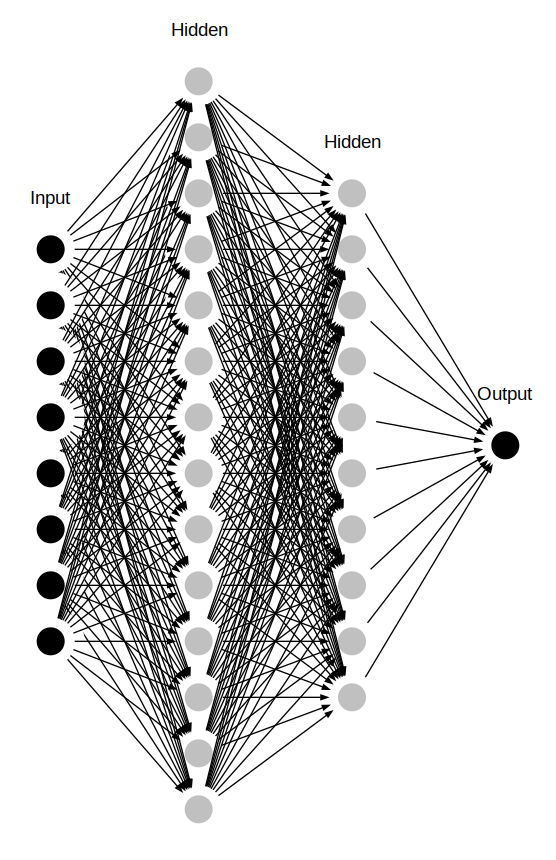

### Also, each layer may have different function:
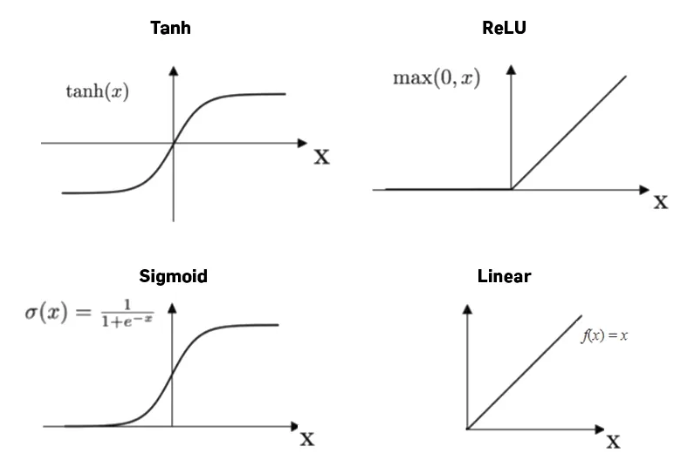

In [ ]:
model_keras2 =  Sequential([
    Dense(512,  activation='elu', input_shape=(8,), name="lay1"),
    Dense(128,  activation='sigmoid', name="lay2"),
    Dense(1,    activation='linear', name="output"),
])
model_keras2.add(Dense(1, activation = 'linear', input_dim = 8))  # x's are 8 dimensional
model_keras2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lay1 (Dense)                (None, 512)               4608      
                                                                 
 lay2 (Dense)                (None, 128)               65664     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 70403 (275.01 KB)
Trainable params: 70403 (275.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# use Adam() or SGD() optimizer
#optim = optimizers.SGD(learning_rate=0.001)
optim = optimizers.Adam(learning_rate=0.01, clipnorm=1.,   clipvalue=0.5)

# loss = mean_squared_error. I.e., optimze squared error
model_keras2.compile(optimizer=optim, loss = 'mean_squared_error')

In [ ]:
model_keras2.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
129/129 [==============================] - 2s 3ms/step - loss: 1.4344
Epoch 2/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3686
Epoch 3/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3533
Epoch 4/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3579
Epoch 5/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3554
Epoch 6/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3432
Epoch 7/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3634
Epoch 8/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3462
Epoch 9/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3487
Epoch 10/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3517
Epoch 11/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3468
Epoch 12/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3552
Epoch 13/50
129/129 [====

In [ ]:
x_test.shape

(4128, 8)

In [ ]:
y_test_pred2 = model_keras2.predict(x_test)
lost_houses2 = np.mean( (y_test-y_test_pred2 )**2)
print(lost_houses2)

129/129 [==============================] - 0s 1ms/step
1.311013280210267


# AUTOENCODERS

Again, MNIST images:

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
n_samples_train, h, w =     x_train.shape
n_samples_test, _, _ =      x_test.shape

image_size = h*w

x_train = x_train.reshape(x_train.shape[0], 784) / 255
x_test = x_test.reshape(x_test.shape[0], 784) / 255

In [ ]:
print("n_samples_train, h, w, image_size = ",n_samples_train, h, w ,image_size)

n_samples_train, h, w, image_size =  60000 28 28 784


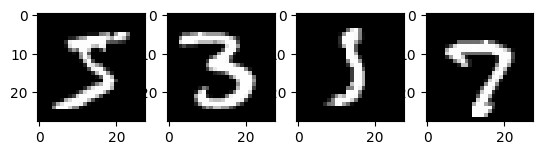

In [ ]:
f = plt.figure()
f.add_subplot(1,4, 1)
img=x_train[0].reshape(h,w)
plt.imshow(img,cmap='gray')
img=x_train[12].reshape(h,w)
f.add_subplot(1,4, 2)
plt.imshow(img,cmap='gray')
f.add_subplot(1,4, 3)
img=x_train[132].reshape(h,w)
plt.imshow(img,cmap='gray')
f.add_subplot(1,4, 4)
img=x_train[52].reshape(h,w)
plt.imshow(img,cmap='gray')
plt.show()

# Goal: "compress" each image to 2d points, later "recover" images from those

# PCA 2d points:

In [ ]:
mu = x_train.mean(axis=0)
U,s,V = np.linalg.svd(x_train - mu, full_matrices=False)
Zpca = np.dot(x_train - mu, V.transpose())

Rpca = np.dot(Zpca[:,:2], V[:2,:]) + mu    # reconstruction



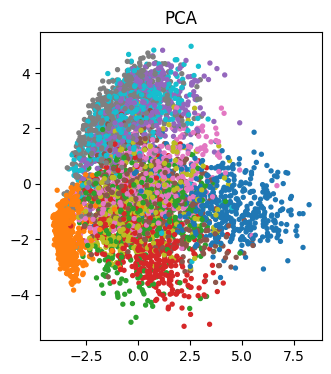

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('PCA')
plt.scatter(Zpca[:5000,0], Zpca[:5000,1], c=y_train[:5000], s=8, cmap='tab10')

# PCA: images reconstructed from 2d points

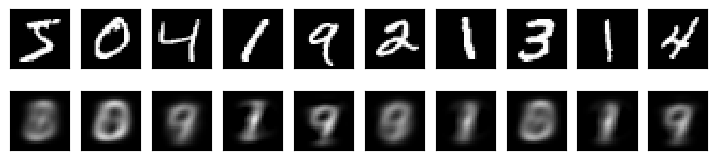

In [ ]:
plt.figure(figsize=(9,3))
toPlot = (x_train, Rpca )
for i in range(10):
    for j in range(2):
        ax = plt.subplot(3, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i,:]).reshape(28,28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

#plt.tight_layout()

In [ ]:
PCA_err = np.sum((x_train-Rpca)**2)/(n_samples_train*image_size)
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));

PCA reconstruction error with 2 PCs: 0.056


# Autoencoder AE
## Network:

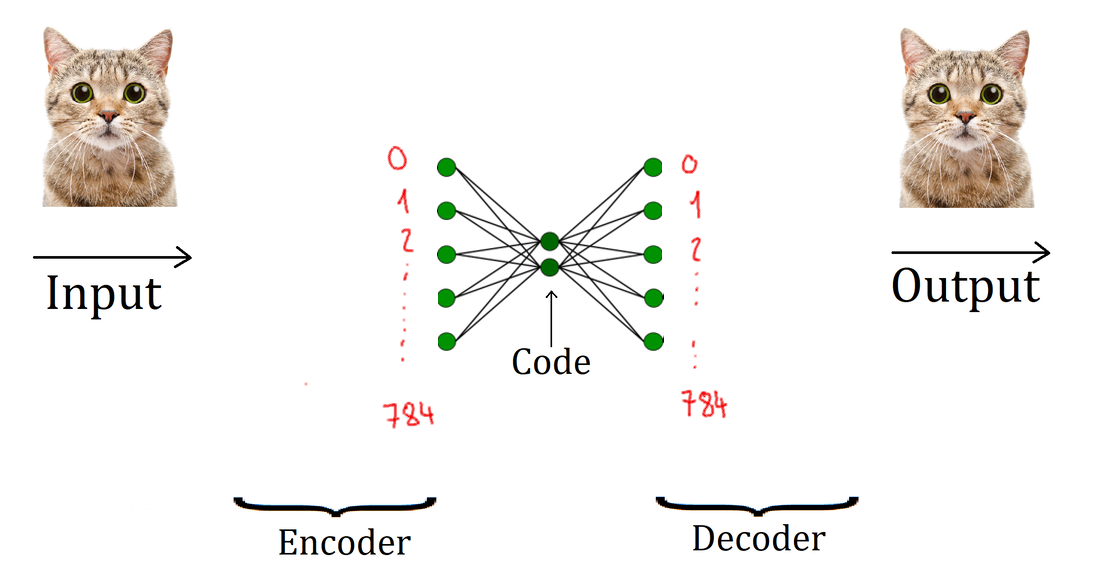

In [ ]:
encoder = Sequential([
    Dense(2,   activation='elu', input_shape=(784,)),
])

decoder = Sequential([
    Dense(784,  activation='relu', input_shape=(2,)),
])

AE_model_small = Model(inputs=encoder.input, outputs=decoder(encoder.output))
AE_model_small.compile(loss='mean_squared_error', optimizer = optimizers.Adam())

In [ ]:
AE_model_small.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1570      
                                                                 
 sequential_4 (Sequential)   (None, 784)               2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Above is equivalent to:

In [ ]:
AE_model_small_v2 =  Sequential([
    Dense(2,  activation='elu', input_shape=(784,), name="lay1"),
    Dense(784,    activation='linear', name="output"),
])
AE_model_small_v2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lay1 (Dense)                (None, 2)                 1570      
                                                                 
 output (Dense)              (None, 784)               2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start_time = datetime.now()

AE_model_small.fit(x_train, x_train, batch_size=128, epochs=5, verbose=1)

time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.0775
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0676
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0661
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0648
TRAINING TIME (hh:mm:ss.ms) 0:00:11.992797


In [ ]:
x_train_reconstr  = AE_model_small(x_train)
AE_small_error= np.sum((x_train-x_train_reconstr)**2)/(n_samples_train*image_size)
print('AE_small reconstruction error with size 2: ' + str(round(AE_small_error,3)));
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));

AE_small reconstruction error with size 2: 0.064
PCA reconstruction error with 2 PCs: 0.056


In [ ]:
x_train_encoded = encoder(x_train)
print(x_train_encoded.shape)

(60000, 2)


# Why encoder and decoder have only one layer?



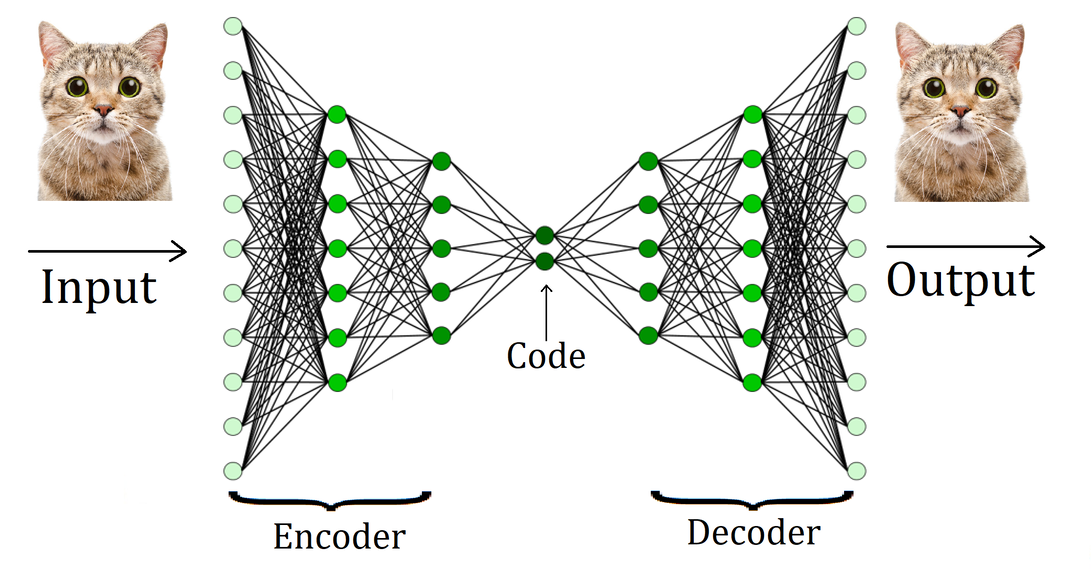

In [ ]:
encoder_larger1 = Sequential([
    Dense(512,  activation='elu', input_shape=(784,), name="lay1"),
    Dense(128,  activation='elu'),
    Dense(2,    activation='linear', name="bottleneck"),
])

decoder_larger1 = Sequential([
    Dense(128,  activation='elu'),
    Dense(512,  activation='elu'),
    Dense(784,  activation='sigmoid'),
])

AE_larger1 = Model(inputs=encoder_larger1.input, outputs=decoder_larger1(encoder_larger1.output))
AE_larger1.compile(loss='mean_squared_error', optimizer = optimizers.Adam())

In [ ]:
AE_larger1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lay1_input (InputLayer)     [(None, 784)]             0         
                                                                 
 lay1 (Dense)                (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 sequential_7 (Sequential)   (None, 784)               468624    
                                                                 
Total params: 936466 (3.57 MB)
Trainable params: 936466 (3.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start_time = datetime.now()

AE_larger1.fit(x_train, x_train, batch_size=128, epochs=10, verbose=1)

time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.0567
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0468
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0436
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0420
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0409
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0400
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0393
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0389
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0384
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0380
TRAINING TIME (hh:mm:ss.ms) 0:00:42.840085


# Q6.0 (extra, 0 points)
* Go to `Runtime -> Change runtime type` and try (not always available) to re-run above and compare training time.

In [ ]:
x_train_reconstr_larger1 = AE_larger1(x_train)
x_train_encoded_larger1 = encoder_larger1(x_train)

In [ ]:
AE_larger1_err = np.sum((x_train-x_train_reconstr_larger1)**2)/(n_samples_train*image_size)

In [ ]:
print('AR_larger1  reconstruction error with size 2: ' + str(round(AE_larger1_err,3)));
print('AE_small reconstruction error with size 2: ' + str(round(AE_small_error,3)));
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));

AR_larger1  reconstruction error with size 2: 0.038
AE_small reconstruction error with size 2: 0.064
PCA reconstruction error with 2 PCs: 0.056


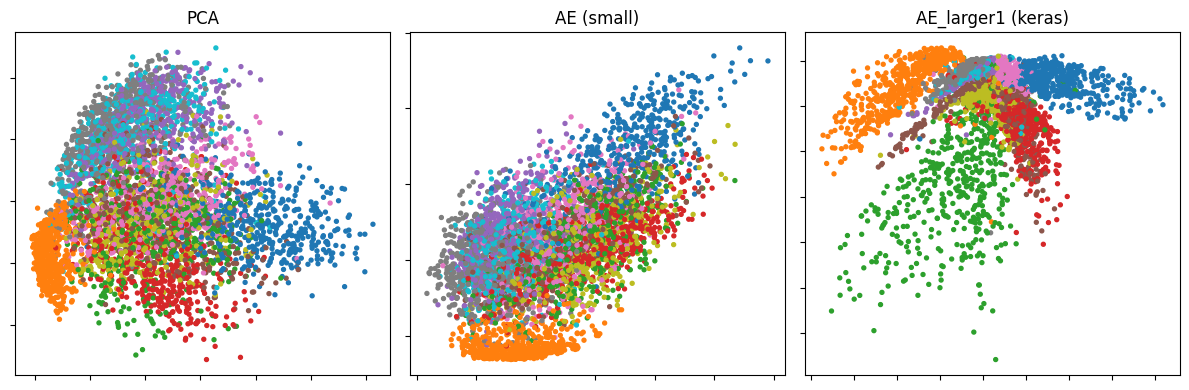

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title('PCA')
plt.scatter(Zpca[:5000,0], Zpca[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(132)
plt.title('AE (small)')
plt.scatter(x_train_encoded[:5000,0], x_train_encoded[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(133)
plt.title('AE_larger1 (keras)')
plt.scatter(x_train_encoded_larger1[:5000,0], x_train_encoded_larger1[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])



plt.tight_layout()

Reconstructed images:


*   Row 1 = original images
*   Row 2 = PCA
*   Row 3 = Autoencoder (small)
*   Row 4 = Autoencoder_larger1  


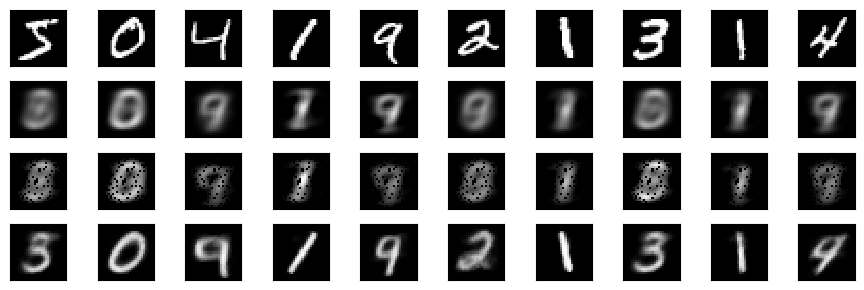

In [ ]:
plt.figure(figsize=(9,3))
toPlot = (x_train, Rpca, x_train_reconstr,x_train_reconstr_larger1)
for i in range(10):
    for j in range(4):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i,:]).reshape(28,28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

# Q6.1
* Construct in a similar way Autoencoder with $r=3$ neurons "in the middle" and display 3d images
* Repeat the same with some larger $r>3$, display several reconstructed images and compute the reconstruction error

# AUTOENCODERS FOR DENOSING IMAGES

# Add noise to mnist:

In [ ]:
noise_level=0.25

x_train_noisy = x_train+noise_level*np.random.normal(loc=0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test+noise_level*np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)


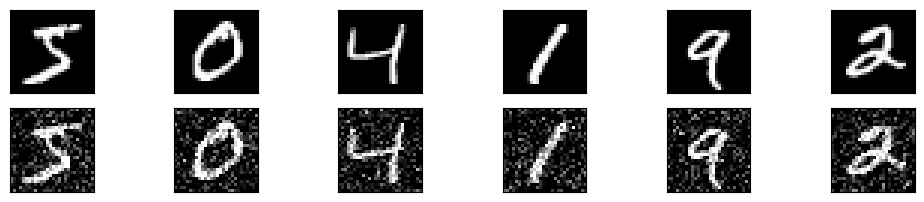

In [ ]:
plt.figure(figsize=(10,12))
for i in range(6):
  ax = plt.subplot(12, 6, i+1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(x_train[i].reshape(28,28), interpolation="nearest", vmin=0, vmax=1)
  ax = plt.subplot(12, 6, 6+i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28), interpolation="nearest", vmin=0, vmax=1)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.tight_layout()

# Q6.2
* Construct Autoencoder (similar to AE_larger1, but may have larger $r$) so that: on input it gets noisy images from training set (i.e., `x_train_noisy`), the output is compared to original unnoised image (i.e., from `x_train`, use `mean_squared_error`).
* Display some of your denoised images
* Unnoise images `x_test_noisy` and compare (MSE) with `x_test`
* Play aroudn: try different number of hidden layers, different activation functions, etc. For your best network try to apply it for larger values of `noise_level`